Importing the necessary libraries.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Reading the data.

In [33]:
df = pd.read_csv('Real estate_reg Example.csv')

Taking a look at the first 5 row of the data to see and understand our data.

In [34]:
df.head()

,X1 house age,X2 distance to the nearest MRT station,X3 number of convenience stores,X4 latitude,X5 longitude,Y house price of unit area
0,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,5.0,390.56840,5.0,24.97937,121.54245,43.1


Taking a look at the statistics of the data.

In [35]:
df.describe()

,X1 house age,X2 distance to the nearest MRT station,X3 number of convenience stores,X4 latitude,X5 longitude,Y house price of unit area
count,403.000000,404.000000,410.000000,409.000000,412.000000,414.000000
mean,17.710422,1080.723682,4.119512,24.968971,121.533337,37.980193
std,11.458304,1264.396933,2.944118,0.012413,0.015362,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,8.950000,289.324800,1.000000,24.962990,121.529055,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.300000,1451.241000,6.000000,24.977440,121.543295,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Lets see our columns.

In [36]:
df.columns

Index(['X1 house age', 'X2 distance to the nearest MRT station',
       'X3 number of convenience stores', 'X4 latitude', 'X5 longitude',
       'Y house price of unit area'],
      dtype='object')

1-If more than two values are missed, delete the row of data.

In [37]:
df.dropna(thresh=df.shape[1]-2, inplace=True)

2-Fill the missing value of column “X1 house age” by the mean of the column.

In [38]:
df['X1 house age'].fillna(df['X1 house age'].mean(), inplace=True)

3-Fill the missing value of column “X2 distance to the nearest MRT station” by 
the median of the column.

In [39]:
df['X2 distance to the nearest MRT station'].fillna(df['X2 distance to the nearest MRT station'].median(), inplace=True)


4-Fill missing value of column “X3 number of convenience stores” by the Mode 
of the column.


In [40]:
df['X3 number of convenience stores'].fillna(df['X3 number of convenience stores'].mode()[0], inplace=True)

5-Draw the pair_plot

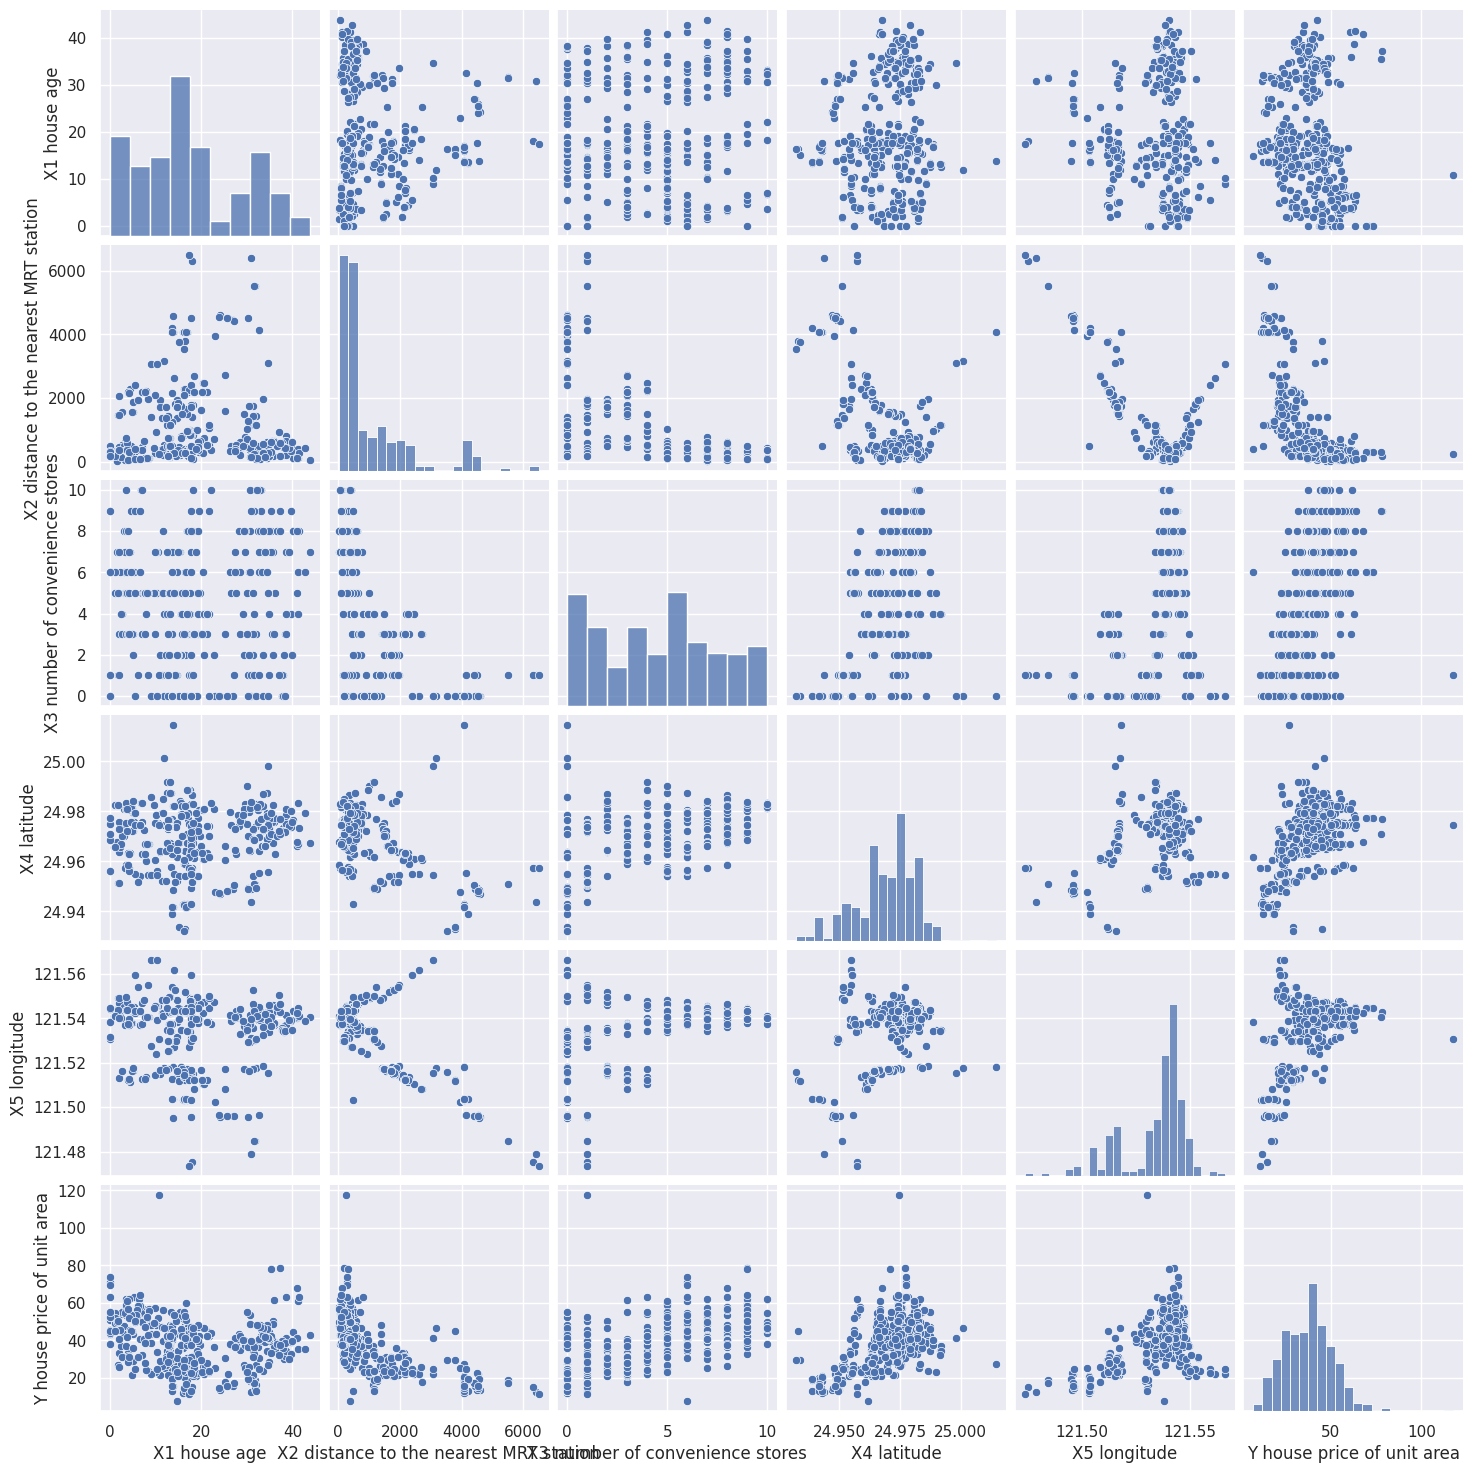

In [41]:
sns.pairplot(df)
plt.show()

6-Draw the correlation plot

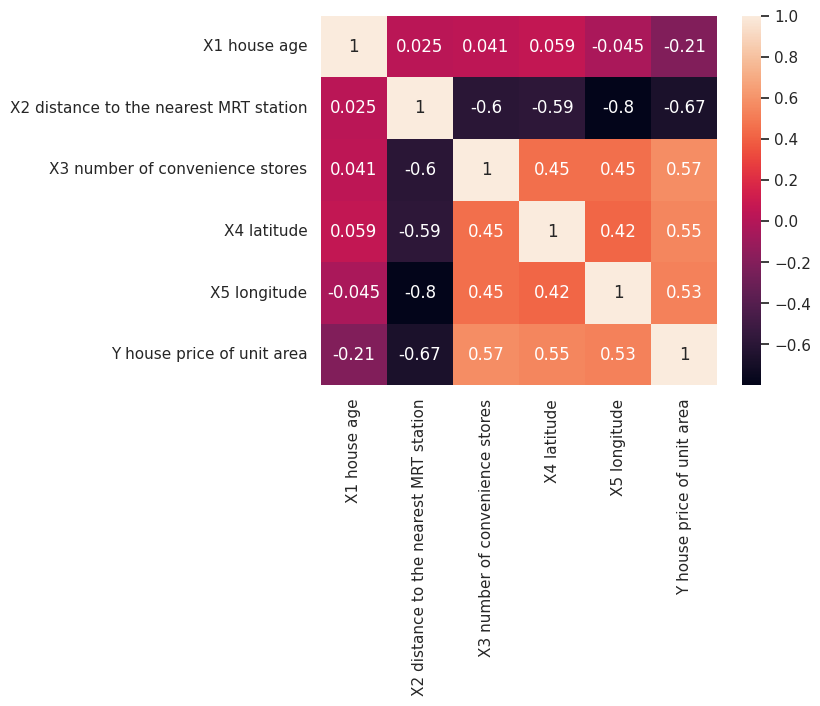

In [42]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

7-Calculate regression coefficients.

In [43]:
# Split the dataset into X and y
X = df.drop(columns=['Y house price of unit area'])
y = df['Y house price of unit area']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Get regression coefficients
reg_coeffs = reg_model.coef_
print("Regression Coefficients:")
for feature, coeff in zip(X.columns, reg_coeffs):
    print(f"{feature}: {coeff}")

Regression Coefficients:
X1 house age: -0.26002566189356796
X2 distance to the nearest MRT station: -0.004216622866599603
X3 number of convenience stores: 1.122244245480062
X4 latitude: 252.71719624426387
X5 longitude: 11.781610492388593


8-Calculate R^2 and MSE

In [44]:
# Predict on the test set
y_pred = reg_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate mean squared error
ms = mean_squared_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", ms)

R-squared: 0.5823042721939953
Mean Squared Error: 68.32470912813199
